In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from pathlib import Path
from utils import getsize
import pandas as pd

In [3]:
files = Path('res/')

In [4]:
data = {}
for fl in files.glob('*.pkl'):
    with open(fl, 'rb') as fh: data[str(fl)] = pickle.load(fh)

In [5]:
KEYS = list(data.keys())
KEYS = sorted(KEYS)

N = len(data[KEYS[0]][1])
L = data[KEYS[0]][1][0]['L']

df = pd.DataFrame([k[4:-4].split('-') for k in KEYS])
df.columns = ['N', 'T', 'D', 'pt', 'market', 'freq', 'seed', 'only_update_price', 'flat']

df.flat = df.flat.fillna(False)
df.only_update_price = df.only_update_price.fillna(False)

for col in ['N', 'T', 'D', 'seed']:
    df[col] = df[col].astype(int)
    
for col in ['only_update_price', 'flat', 'market']:
    df[col] = df[col].astype(bool)


In [6]:
df[(df.seed == 1234) & (df.flat == True) & (df.only_update_price == True)]

,N,T,D,pt,market,freq,seed,only_update_price,flat
0,50,48,10,neutral,True,1,1234,True,True
1,50,48,10,neutral,True,1,1234,True,True
12,50,48,10,neutral,True,5,1234,True,True
13,50,48,10,neutral,True,5,1234,True,True
24,50,48,10,optimistic,True,1,1234,True,True
25,50,48,10,optimistic,True,1,1234,True,True
36,50,48,10,optimistic,True,5,1234,True,True
37,50,48,10,optimistic,True,5,1234,True,True
48,50,48,10,pesimistic,True,None,1234,True,True
54,50,48,10,pesimistic,True,1,1234,True,True


In [16]:
M = 0
k_ = 0
pairs = []
for k in KEYS:
    dd = data[k][1]
    lo = np.vstack([dd[n]['history_post_net'] for n in range(N)]).sum(axis=0).max()
    pairs.append((k, lo))
    
mm = pd.DataFrame(pairs)

In [18]:
mm.sort_values(1)

,0,1
62,res/50-48-10-pesimistic-True-1-69-False-True.pkl,120.933880
87,res/50-48-10-solar-True-1-69-True-True.pkl,122.679774
8,res/50-48-10-neutral-True-1-69-False-True.pkl,123.024291
99,res/50-48-10-solar-True-5-69-True-True.pkl,123.033687
86,res/50-48-10-solar-True-1-69-False-True.pkl,123.244645
...,...,...
15,res/50-48-10-neutral-True-5-1234.pkl,331.089404
2,res/50-48-10-neutral-True-1-1234-True.pkl,331.089404
14,res/50-48-10-neutral-True-5-1234-True.pkl,331.089404
16,res/50-48-10-neutral-True-5-1312-True.pkl,333.366611


36289.65474912559


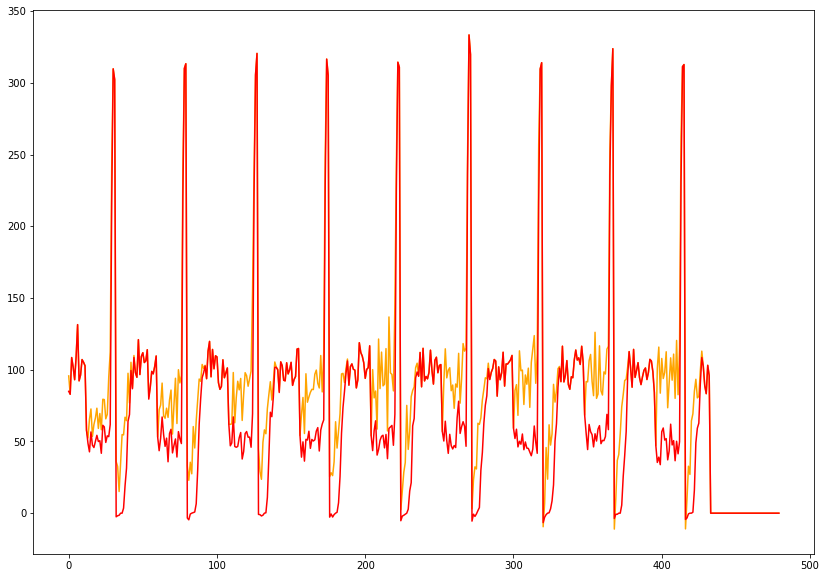

In [33]:
dd_1 = data['res/50-48-10-neutral-True-1-1312-True.pkl'][1]
v_market = np.vstack([dd_1[n]['history_post_net'] for n in range(N)]).sum(axis=0)
v_pre = np.vstack([dd_1[n]['history_pre_net'] for n in range(N)]).sum(axis=0)
l_market = np.vstack([dd_1[n]['allload'] for n in range(N)]).sum(axis=0)


dd_2 = data['res/50-48-10-pesimistic-False-None-1312.pkl'][1]
v_def = np.vstack([dd_2[n]['history_post_net'] for n in range(N)]).sum(axis=0)
l_def = np.vstack([dd_2[n]['allload'] for n in range(N)]).sum(axis=0)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
#ax.plot(v_market, c='r')
#ax.plot(v_def, c='k')
#ax.plot(v_def, c='b')
ax.plot(v_pre, c='orange')
ax.plot(v_market, c='red')
#plt.plot(l_market, c='g')

print(l_def.sum())

/home/guso/github/lemsim_code/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/guso/github/lemsim_code/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Players learn only market prices but not market quantities. Flat Rate')

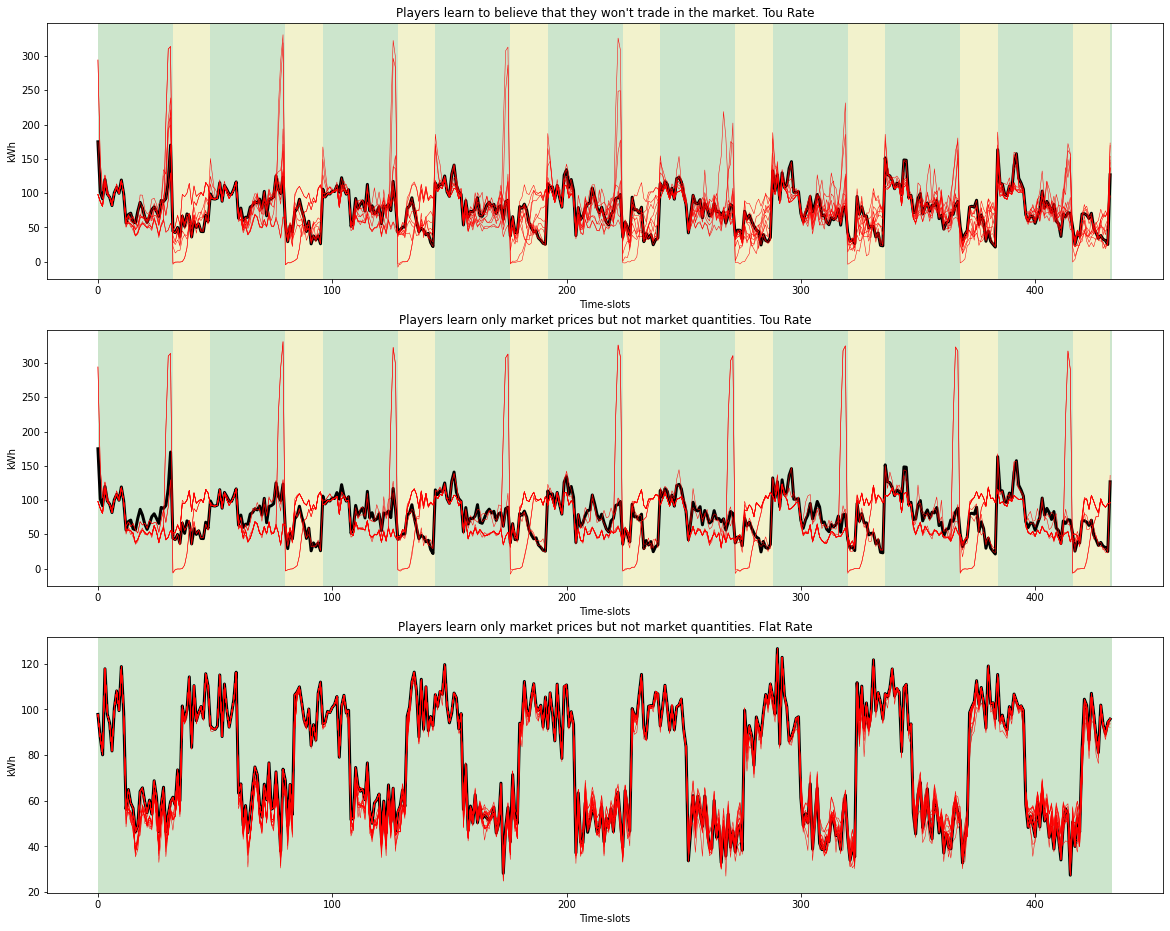

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(20, 16))

SEED = 1234

df_ = df[(df.seed == SEED)]

no_market_tou_idx = df_[(df_.freq == 'None') & (df.flat==False)].index[0] 
data_ = data[KEYS[no_market_tou_idx]][1]
prices_tou = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
val_no_market_tou = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]

no_market_flat_idx = df_[(df_.freq == 'None') & (df.flat==True)].index[0] 
data_ = data[KEYS[no_market_flat_idx]][1]
prices_flat = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
val_no_market_flat = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]

upq_tou_idx = df_[(df_.only_update_price == False) & (df_.flat == False)].index.values
up_tou_idx = df_[(df_.only_update_price == True) & (df_.flat == False)].index.values
up_flat_idx = df_[(df_.only_update_price == True) & (df_.flat == True)].index.values

for l in range(433):
    ax[0].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
    ax[1].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
    ax[2].axvspan(l, l+1, facecolor=prices_flat[l], alpha=0.2)

ax[0].plot(val_no_market_tou, c='k', linewidth=3)
ax[1].plot(val_no_market_tou, c='k', linewidth=3)
ax[2].plot(val_no_market_flat, c='k', linewidth=3)

for i in range(3):
    ax[i].set_xlabel('Time-slots')
    ax[i].set_ylabel('kWh')
    
    
## Update prices and quantities, TOU
for idx in upq_tou_idx:
    k = KEYS[idx]
    data_ = data[k][1]
    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
    ax[0].plot(val, c='r', linewidth = 0.5)
    
## Update only prices, TOU
for idx in up_tou_idx:
    k = KEYS[idx]
    data_ = data[k][1]
    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
    ax[1].plot(val, c='r', linewidth = 0.5)
    
## Update prices and quantities, flat rate
#for idx in upq_flat_idx:
#    k = KEYS[idx]
#    data_ = data[k][1]
#    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
#    ax[2].plot(val, c='r', linewidth = 0.5)

## Upadte only prices, flat rate
for idx in up_flat_idx:
    k = KEYS[idx]
    data_ = data[k][1]
    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
    ax[2].plot(val, c='r', linewidth = 0.5)

ax[0].set_title("Players learn to believe that they won't trade in the market. Tou Rate")
ax[1].set_title("Players learn only market prices but not market quantities. Tou Rate")
ax[2].set_title("Players learn only market prices but not market quantities. Flat Rate")

#fig.savefig('Figure_1.png', dpi=200)

In [72]:
PT = 'solar'


,N,T,D,pt,market,freq,seed,only_update_price,flat
100,50,48,10,solar,True,5,69,True,False
101,50,48,10,solar,True,5,69,False,False


In [74]:
def plot_pre_post(PT):
    df_ = df[(df.seed == 69) & (df.freq == '5') & (df.pt == PT) & (df.flat == False)]
    df_

    UP = df_[(df_.only_update_price == True)].index[0]
    UPQ = df_[(df_.only_update_price == False)].index[0]

    fig, ax = plt.subplots(2, 1, figsize=(20, 16))



    # UPQ
    data_ = data[KEYS[UPQ]][1]
    prices_TOU = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
    val_UPQ_pre = np.vstack([data_[n]['history_pre_net'] for n in range(N)]).sum(axis=0)[:433]
    val_UPQ_post = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]

    for l in range(433):
        ax[0].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
        ax[1].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)

    ax[1].plot(val_UPQ_pre, c='b', label='Quantity bidded in the market')
    ax[1].plot(val_UPQ_post, c='k',label='Real quantity consumed at the end of the period')
    ax[1].legend()
    ax[1].set_title('[{0}] Players learn that they do not trade that much in the market. Dumping effect at the end'.format(PT))

    # UP
    data_ = data[KEYS[UP]][1]
    prices_TOU = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
    val_UP_pre = np.vstack([data_[n]['history_pre_net'] for n in range(N)]).sum(axis=0)[:433]
    val_UP_post = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]


    ax[0].plot(val_UP_pre, c='b', label='Quantity bidded in the market')
    ax[0].plot(val_UP_post, c='k',label='Real quantity consumed at the end of the period')
    ax[0].legend()
    ax[0].set_title('[{0}] Players remain optimistic about the amount of energy they will trade in the market'.format(PT))

    fig.savefig("Figure_2_{0}.png".format(PT), dpi=200)


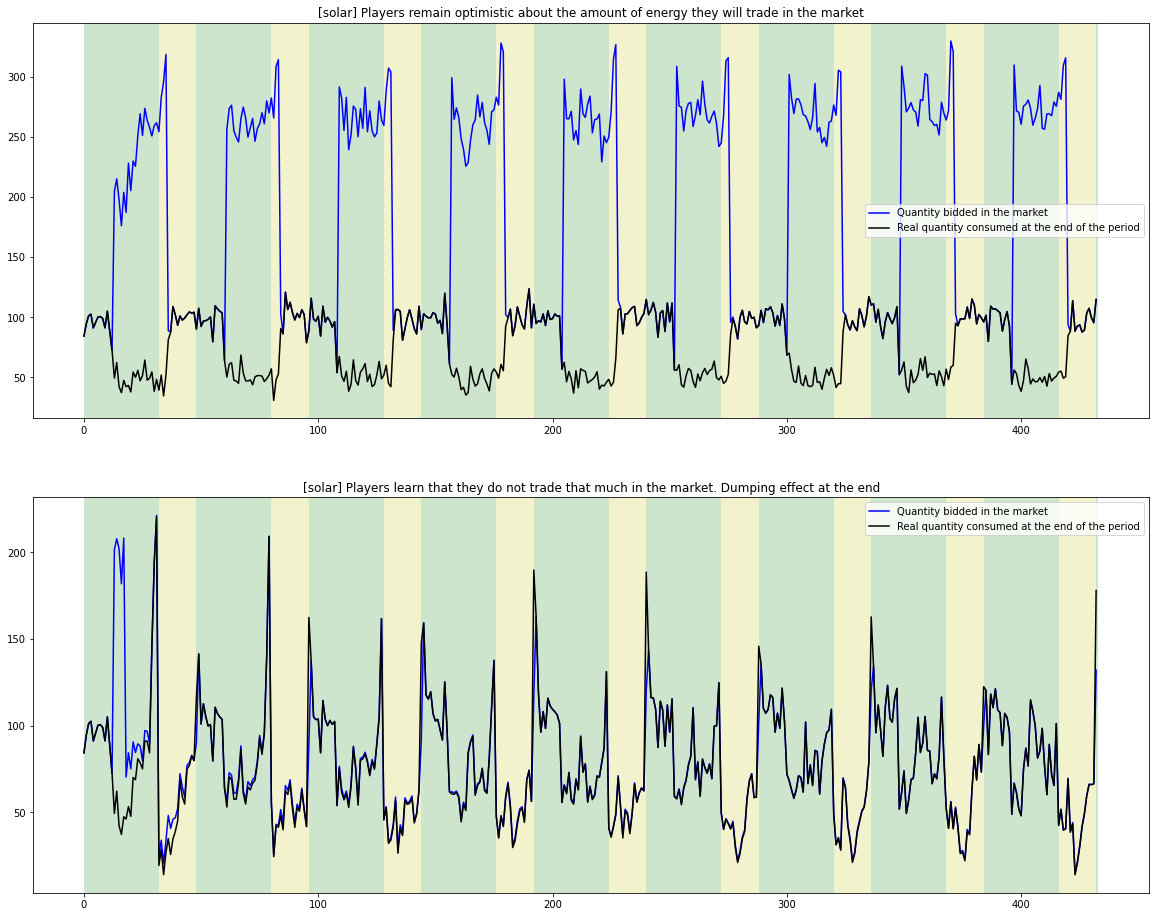

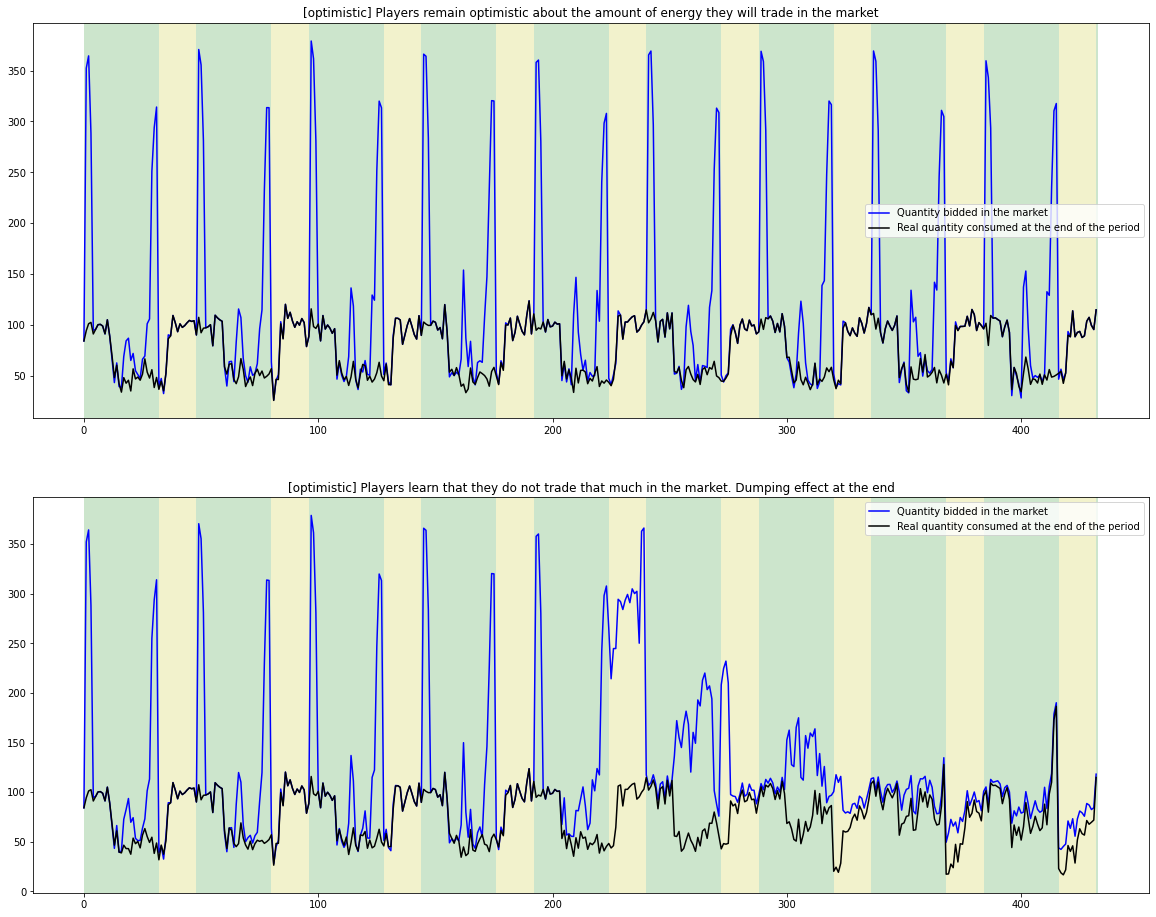

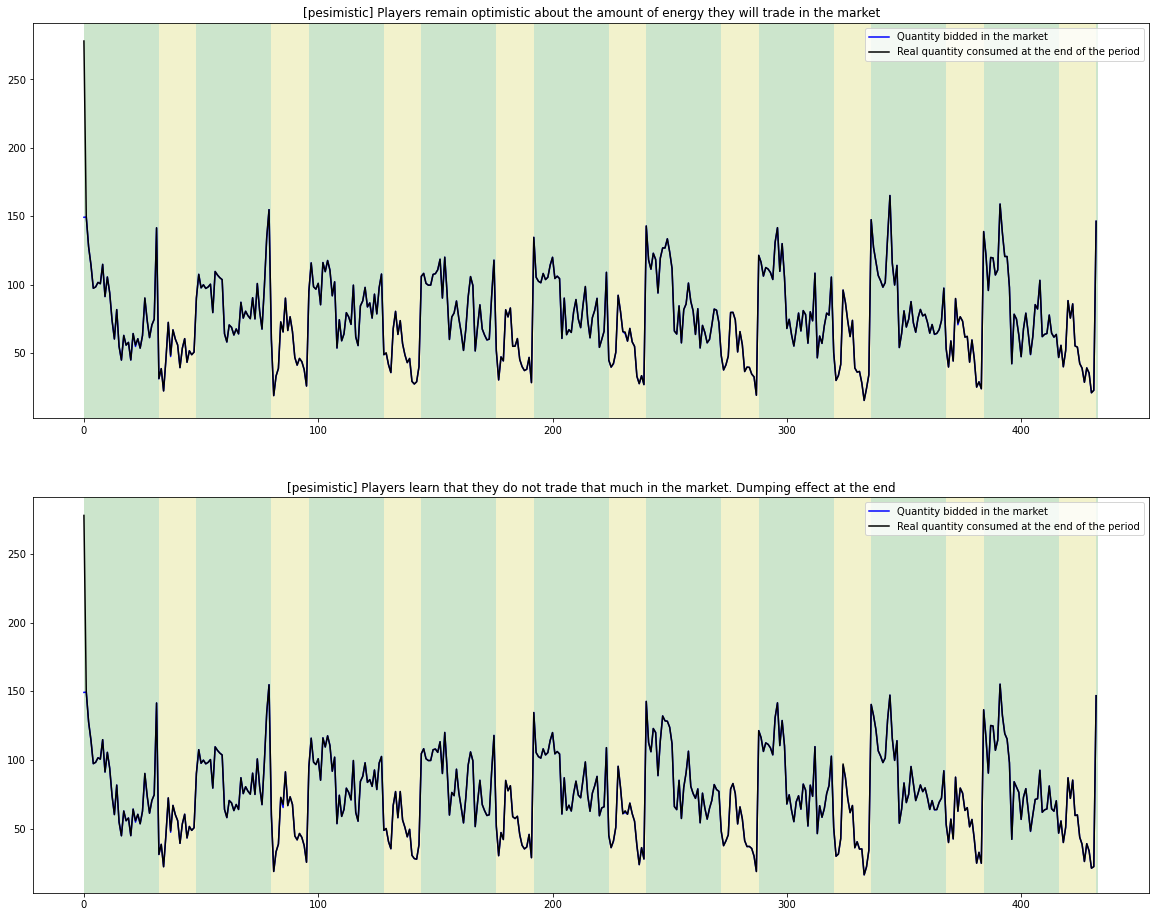

In [75]:
plot_pre_post("solar")
plot_pre_post("optimistic")
plot_pre_post("pesimistic")